### Aim : To predict the behaviour of sapa.com customers towards responding to a marketing campaign
#### Objective : To create a binary classification machine learning model to perform this task
#### Business problem : Predicting if a customer will respond to a marketing campaign
#### Machine Learning problem : Understanding the given parameters, and checking how these parameter affect the responsiveness of a customer
___
#### Methodology
* Import libraries
* Load dataset
* User defined functions
* Exploratory Data Analysis
* Check for anomalies, that is, outliers/noise, and clean the data
* Preprocessing
* Feature selection and engineering
* Dealing with imbalanced dataset
* Build models and make predictions
* Check for accuracy, using evaluation metrics
* Present / Submit the results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_row",None,"display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
train = pd.read_csv('Train.csv', parse_dates = ['Date_Customer'])
test = pd.read_csv('Test.csv', parse_dates = ['Date_Customer'])

### User Defined Functions

In [3]:
def quality_report(df):
    
    """
    Description: Displays quality of data in terms of missing values, number of unique values,
    percentage of missing values and data type.
    
    Arguement: Dataframe
    """
    
    dtype = df.dtypes
    nunique = df.nunique()
    null_values = df.isna().sum()
    percent = (df.isna().sum()/df.count()*100).round(2)
    report_df = pd.concat([nunique, null_values, percent, dtype], axis = 1, keys = ['Nunique', 'Total_NaN', 'Percentage of NaN', 'Dtypes'])
    return report_df

def object_count_plot(df):
    
    """
    Description: Plots countplot for all categotical features in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for var in df.columns.difference(['ID']):
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize = (12, 7))
            plot = sns.countplot(x = var, data = df)
            plt.tight_layout()
            plt.show()
    return plot

def num_dist_plot(df):
    
    """
    Description: Plots distribution plot for the numerical features selected in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize = (12, 7))
            print(col)
            plt.title('Distribution plot for ' + col)
            plot = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

### Exploratory Data Analysis

In [4]:
quality_report(train)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
ID,1568,0,0.00,object
Year_of_Birth,56,0,0.00,int64
Education_Level,5,0,0.00,object
Marital_Status,8,0,0.00,object
Disposable_Income,1431,16,1.03,float64
No_of_Kids_in_home,3,0,0.00,int64
No_of_Teen_in_home,3,0,0.00,int64
Date_Customer,619,0,0.00,datetime64[ns]
Recency,100,0,0.00,int64
Discounted_Purchases,15,0,0.00,int64


#### Univariate analysis

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64


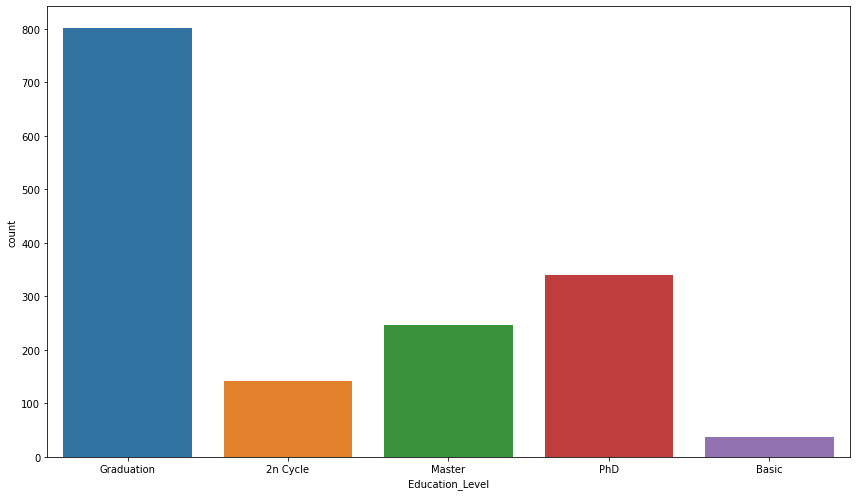

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64


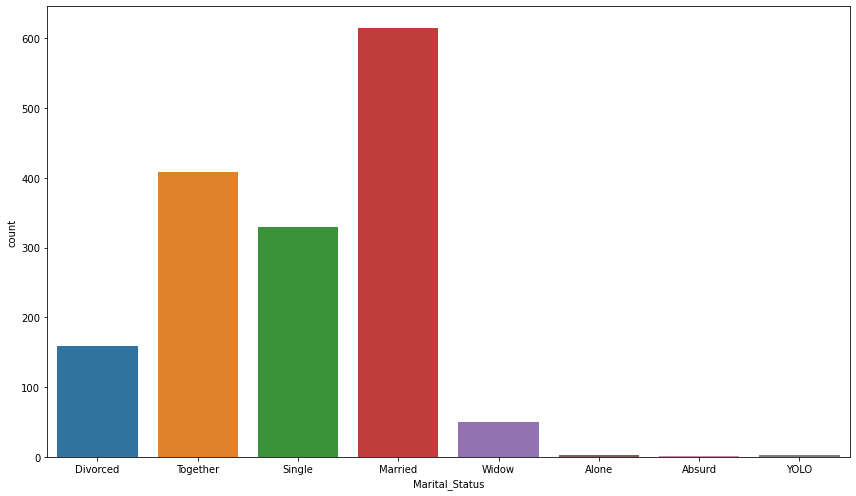

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

In [5]:
object_count_plot(train)

In [6]:
# num_dist_plot(train)

<AxesSubplot:xlabel='Response', ylabel='count'>

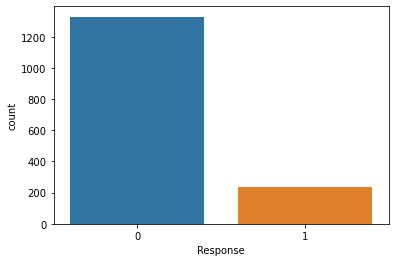

In [7]:
sns.countplot(train.Response)

In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1552 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

(None, None)

In [9]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Locating and treating Outlier

<AxesSubplot:xlabel='Disposable_Income'>

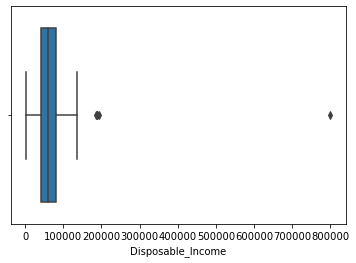

In [11]:
sns.boxplot(train.Disposable_Income)

<AxesSubplot:xlabel='Disposable_Income'>

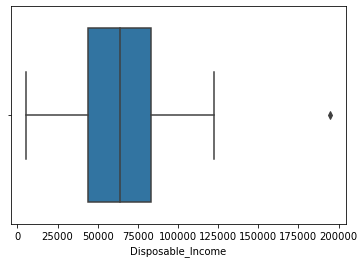

In [12]:
sns.boxplot(test.Disposable_Income)

In [13]:
train[train.Disposable_Income > 200000]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
190,ID_VIUX07W2,1978,Graduation,Together,799999.2,1,0,2013-02-06,30,4,3,1,3,14,17,18,8,1,12,6,0,0,0,0,0,0,0


In [14]:
train = train.drop(190)

### Treating missing values

In [15]:
train.Disposable_Income.fillna(train.Disposable_Income.median(), inplace = True)
test.Disposable_Income.fillna(test.Disposable_Income.median(), inplace = True)

In [16]:
train.shape, test.shape

((1567, 27), (672, 26))

### Data Preprocessing

#### Handling categorical features

In [17]:
education = {
    'Graduation' : 1,
    'PhD' : 2,
    'Master' : 3,
    '2n Cycle' : 4,
    'Basic' : 5
}

train.Education_Level = train.Education_Level.map(education)
test.Education_Level = test.Education_Level.map(education)

marital = {
    'Married' : 1,
    'Together' : 2,
    'Single' : 3,
    'Divorced' : 4,
    'Widow' : 5,
    'Alone' : 6,
    'YOLO' : 7,
    'Absurd' : 8
}

train.Marital_Status = train.Marital_Status.map(marital)
test.Marital_Status = test.Marital_Status.map(marital)

#### Combining Dataset

In [18]:
test['Response'] = 'test'
all_data = pd.concat((train,test)).reset_index(drop=True)

In [19]:
# all_data

###  Feature Engineering and Selection

In [20]:
max(all_data['Date_Customer'])

Timestamp('2014-12-06 00:00:00')

In [21]:
all_data['year'] = all_data.Date_Customer.dt.year
all_data['month'] = all_data.Date_Customer.dt.month
all_data['quarter'] = all_data.Date_Customer.dt.quarter

today = pd.to_datetime('2014-12-31')

all_data['duration_days'] = (today - all_data.Date_Customer).dt.days
all_data['duration_months'] = ((today - all_data.Date_Customer)/np.timedelta64(1, 'M')).astype(int)
all_data['is_month_end'] = all_data.Date_Customer.dt.is_month_end.astype(int)
all_data['is_month_start'] = all_data.Date_Customer.dt.is_month_start.astype(int)

In [22]:
all_data['no_of_children'] = all_data['No_of_Kids_in_home'] + all_data['No_of_Teen_in_home']

In [23]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

poly1 = poly.fit_transform(all_data[poly_feature_1])
poly2 = poly.fit_transform(all_data[poly_feature_2])

In [26]:
df_poly1 = pd.DataFrame(poly1, columns = [f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns = [f"poly2_{i}" for i in range(poly2.shape[1])])

In [27]:
display(df_poly1.columns, df_poly2.columns)

Index(['poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9'],
      dtype='object')

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11',
       'poly2_12', 'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17',
       'poly2_18', 'poly2_19', 'poly2_20'],
      dtype='object')

In [28]:
new_data = pd.concat([all_data.drop('Date_Customer', axis = 1), df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [29]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', '

In [30]:
# year_month
new_data['year_month'] = new_data['year'].astype(str) + "_" + new_data['month'].astype(str)

In [31]:
# bin_label
new_data['Recency_bin'] = pd.qcut(new_data.Recency, q = [0, .2, .4, .6, .8, 1], labels = False)

In [32]:
new_data['Recency_mean_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('mean')
new_data['Recency_std_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('std')
new_data['Recency_min_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('min')
new_data['Recency_max_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('max')

In [33]:
new_data['year_month_int'], unique = pd.factorize(new_data['year_month'])

In [34]:
new_data['Total_Purchase'] = new_data[poly_feature_1].sum(axis = 1)
new_data['Total_Amount'] = new_data[poly_feature_2].sum(axis = 1)

In [35]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', '

In [36]:
new_data.shape

(2239, 74)

In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2239 non-null   object 
 1   Year_of_Birth            2239 non-null   int64  
 2   Education_Level          2239 non-null   int64  
 3   Marital_Status           2239 non-null   int64  
 4   Disposable_Income        2239 non-null   float64
 5   No_of_Kids_in_home       2239 non-null   int64  
 6   No_of_Teen_in_home       2239 non-null   int64  
 7   Recency                  2239 non-null   int64  
 8   Discounted_Purchases     2239 non-null   int64  
 9   WebPurchases             2239 non-null   int64  
 10  CatalogPurchases         2239 non-null   int64  
 11  StorePurchases           2239 non-null   int64  
 12  Amount_on_Wines          2239 non-null   int64  
 13  Amount_on_Fruits         2239 non-null   int64  
 14  Amount_on_MeatProducts  

In [38]:
train_df = new_data.loc[(new_data['Response'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['Response'] == 'test')].reset_index(drop = True)

In [39]:
train_df.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,year,month,quarter,duration_days,duration_months,is_month_end,is_month_start,no_of_children,poly1_0,poly1_1,poly1_2,poly1_3,poly1_4,poly1_5,poly1_6,poly1_7,poly1_8,poly1_9,poly2_0,poly2_1,poly2_2,poly2_3,poly2_4,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9,poly2_10,poly2_11,poly2_12,poly2_13,poly2_14,poly2_15,poly2_16,poly2_17,poly2_18,poly2_19,poly2_20,year_month,Recency_bin,Recency_mean_on_yr_mth,Recency_std_on_yr_mth,Recency_min_on_yr_mth,Recency_max_on_yr_mth,year_month_int,Total_Purchase,Total_Amount
0,ID_4A9AR6FQ,1955,1,4,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,2,192,6,0,0,2,2.0,1.0,1.0,4.0,2.0,2.0,8.0,1.0,4.0,4.0,71.0,3.0,16.0,0.0,6.0,20.0,213.0,1136.0,0.0,426.0,1420.0,48.0,0.0,18.0,60.0,0.0,96.0,320.0,0.0,0.0,120.0,2014_6,2,53.590164,30.163652,7,106,0,8,116
1,ID_X28T3VEK,1958,1,2,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,1,722,23,0,0,1,6.0,5.0,1.0,8.0,30.0,6.0,48.0,5.0,40.0,8.0,205.0,22.0,111.0,50.0,15.0,19.0,4510.0,22755.0,10250.0,3075.0,3895.0,2442.0,1100.0,330.0,418.0,5550.0,1665.0,2109.0,750.0,950.0,285.0,2013_1,0,56.645833,27.109128,7,106,1,20,422
2,ID_AWXARH57,1962,1,3,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,4,405,13,0,0,0,0.0,7.0,4.0,7.0,0.0,0.0,0.0,28.0,49.0,28.0,469.0,31.0,873.0,29.0,18.0,37.0,14539.0,409437.0,13601.0,8442.0,17353.0,27063.0,899.0,558.0,1147.0,25317.0,15714.0,32301.0,522.0,1073.0,666.0,2013_11,0,55.160000,28.999728,7,104,2,18,1457
3,ID_FQVZHE81,1979,4,3,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,3,474,15,0,0,1,3.0,4.0,1.0,3.0,12.0,3.0,9.0,4.0,12.0,3.0,56.0,15.0,49.0,17.0,24.0,24.0,840.0,2744.0,952.0,1344.0,1344.0,735.0,255.0,360.0,360.0,833.0,1176.0,1176.0,408.0,408.0,576.0,2013_9,2,52.218391,31.242646,7,106,3,11,185
4,ID_QVLWGPRN,1959,1,1,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,1,344,11,0,0,0,1.0,3.0,7.0,9.0,3.0,7.0,9.0,21.0,27.0,63.0,412.0,117.0,445.0,181.0,165.0,203.0,48204.0,183340.0,74572.0,67980.0,83636.0,52065.0,21177.0,19305.0,23751.0,80545.0,73425.0,90335.0,29865.0,36743.0,33495.0,2014_1,2,53.822785,30.751177,7,105,4,20,1523
5,ID_3S3HRGH6,1960,3,1,41090.4,0,1,32,1,0,0,3,13,5,4,0,0,1,5,0,0,0,0,0,0,0,2014,3,1,283,9,0,0,1,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0,0.0,1.0,65.0,52.0,0.0,0.0,13.0,20.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,2014_3,1,51.923077,28.987579,7,106,5,4,23
6,ID_KJQ9B2LE,1953,1,3,86673.6,0,0,94,1,6,7,8,636,31,491,30,14,56,3,0,0,0,0,0,0,0,2012,11,4,764,25,0,0,0,1.0,6.0,7.0,8.0,6.0,7.0,8.0,42.0,48.0,56.0,636.0,31.0,491.0,30.0,14.0,56.0,19716.0,312276.0,19080.0,8904.0,35616.0,15221.0,930.0,434.0,1736.0,14730.0,6874.0,27496.0,420.0,1680.0,784.0,2012_11,4,55.870968,29.479909,7,106,6,22,1258
7,ID_6O0NBZXD,1974,1,2,88711.2,0,0,61,1,6,5,12,632,94,597,159,91,15,3,0,0,0,0,0,0,0,2013,2,1,696,22,0,0,0,1.0,6.0,5.0,12.0,6.0,5.0,12.0,30.0,72.0,60.0,632.0,94.0,597.0,159.0,91.0,15.0,59408.0,377304.0,100488.0,57512.0,9480.0,56118.0,14946.0,8554.0,1410.0,94923.0,54327.0,8955.0,14469.0,2385.0,1365.0,2013_2,2,53.035714,28.370753,8,104,7,24,1588
8,ID_M3QFT8WO,1966,1,2,35606.4,1,1,13,1,0,0,3,14,4,3,0,4,8,6,0,0,0,0,0,0,0,2013,12,4,393,12,0,0,2,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,14.0,4.0,3.0,0.0,4.0,8.0,56.0,42.0,0.0,56.0,112.0,12.0,0.0,16.0,32.0,0.0,12.0,24.0,0.0,0.0,32.0,2013_12,0,60.137255,29.641434,7,105,8,4,33
9,ID_745JV5PY,1975,1,1,41305.2,1,0,88,1,1,0,2,8,6,7,6,2,9,7,0,0,0,0,0,0,0,2013,1,1,723,23,0,0,1,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,8.0,6.0,7.0,6.0,2.0,9.0,48.0,56.0,48.0,16.0,72.0,42.0,36.0,12.0,54.0,42.0,14.0,63.0,12.0,54.0,18.0,2013_1,4,56.64583

In [40]:
train_df['Response'] = train_df['Response'].astype(int)

In [41]:
test_df.drop(['Response'], axis = 1, inplace = True)

In [87]:
train_df.shape,test_df.shape

((1567, 74), (672, 73))

In [42]:
# test_df.head()

In [43]:
feature = new_data.select_dtypes(include = 'number').columns
feature

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quarter',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'no_of_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17', 'poly2_

### Modelling

#### Import neccessary libraries

In [44]:
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, log_loss, make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler # for feature scaling

#### Splitting dataset

In [45]:
target = 'Response'

X = train_df[feature]
y = train_df[target]

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [48]:
X_test.shape

(471, 71)

In [49]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

#### Baseline models

In [50]:
# training without scaled data

rf = RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=1,max_features=None,min_samples_leaf=30)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)[:,1]

print('F1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

F1_score
0.36170212765957444
0.6174496644295301

Accuracy_score
0.8726114649681529
0.8789808917197452


In [51]:
# training with scaled data
# train_pool = Pool(X_train_sc, y_train)
# test_pool = Pool(X_test_sc, y_test)

cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train_sc, y_train)
pred_sc = cat.predict(X_test_sc)
pred_proba_sc = cat.predict_proba(X_test_sc)[:,1]

print('F1_score')
print(f1_score(y_test, pred_sc))
print(f1_score(y_test, np.where(pred_proba_sc > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred_sc))
print(accuracy_score(y_test, np.where(pred_proba_sc > 0.298421, 1, 0)))

F1_score
0.5192307692307693
0.6666666666666666

Accuracy_score
0.8938428874734607
0.9044585987261147


In [52]:
cat_ = CatBoostClassifier(verbose = 0)
cat_.fit(X_train,y_train)
pred = cat_.predict(X_test)
pred_proba = cat_.predict_proba(X_test)[:,1]

print('F1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

F1_score
0.5192307692307693
0.6666666666666666

Accuracy_score
0.8938428874734607
0.9044585987261147


In [53]:
o_f1 = []
o_a = []
threshold_value = np.linspace(0.27, 0.3, 20)

for thresh in threshold_value:
    pred_proba = cat_.predict_proba(X_test)[:,1]
    o_f1.append(f1_score(y_test, np.where(pred_proba > thresh, 1, 0)))
    o_a.append(accuracy_score(y_test, np.where(pred_proba > thresh, 1, 0)))

o_f1 = pd.Series(o_f1)
o_a = pd.Series(o_a)
threshold = pd.Series(threshold_value)

Threshold = pd.concat([o_a, o_f1, threshold], axis = 1, keys = ['catboost_accuacy','catboost_f1', 'threshold'])

In [54]:
Threshold

,catboost_accuacy,catboost_f1,threshold
0,0.902335,0.666667,0.270000
1,0.902335,0.666667,0.271579
2,0.902335,0.666667,0.273158
3,0.902335,0.666667,0.274737
4,0.902335,0.666667,0.276316
5,0.902335,0.666667,0.277895
6,0.902335,0.666667,0.279474
7,0.902335,0.666667,0.281053
8,0.904459,0.671533,0.282632
9,0.904459,0.671533,0.284211


In [55]:
# plt.plot(Threshold.threshold, Threshold.catboost_f1)
# plt.fill_between(Threshold.threshold, Threshold.catboost_f1, facecolor='r', alpha=0.3)
# plt.show()

In [56]:
# rf = RandomForestClassifier(n_estimators = 100, random_state = 100, class_weight='balanced_subsample')

# rf.fit(X_train,y_train)
# pred = rf.predict(X_test)

# print(f1_score(y_test, pred))

In [57]:
# rf = RandomForestClassifier(random_state=1000, class_weight='balanced_subsample')
# pipe = Pipeline([
#     ('scale' , StandardScaler()),
#     ('model' , rf)
# ])
# # pipe.get_params()
# mod = rf.fit(X_train, y_train)
# y = pd.DataFrame(mod.predict(X_test))
# grid = GridSearchCV(
#     estimator = rf,
#     param_grid = {
#         'n_estimators':[100, 200, 300], 'criterion':['entropy','gini'],
#         'max_features':['log2','auto','sqrt'], 'max_depth':[10]
#     },
#     refit = True, 
#     verbose=10,
#     cv = 5,
#     n_jobs = 1,
#     scoring = make_scorer(f1_score)
# )
# grid.fit(X_train,y_train)
# model = grid.predict(X_test)
# # y_teest = pd.DataFrame(model)
# print(f1_score(model, y_test))

In [58]:
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_.get_params())

In [59]:
xgb = XGBClassifier(verbose = 0)
xgb.fit(X_train, y_train)
pred1 = xgb.predict(X_test)
pred_proba1 = xgb.predict_proba(X_test)[:,1]

print('F1_score')
print(f1_score(y_test, pred1))
print(f1_score(y_test, np.where(pred_proba1 > 0.08, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test, np.where(pred_proba1 > 0.08, 1, 0)))

[20:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1_score
0.5470085470085471
0.6419753086419753

Accuracy_score
0.8874734607218684
0.8768577494692145


In [60]:
o_f1 = []
o_a = []
threshold_value = np.linspace(0.07, 0.1, 20)

for thresh in threshold_value:
    pred_proba1 = xgb.predict_proba(X_test)[:,1]
    o_f1.append(f1_score(y_test, np.where(pred_proba1 > thresh, 1, 0)))
    o_a.append(accuracy_score(y_test, np.where(pred_proba1 > thresh, 1, 0)))

o_f1 = pd.Series(o_f1)
o_a = pd.Series(o_a)
threshold = pd.Series(threshold_value)

Threshold = pd.concat([o_a, o_f1, threshold], axis = 1, keys = ['xgboost_accuacy','xgboost_f1', 'threshold'])

In [61]:
Threshold

,xgboost_accuacy,xgboost_f1,threshold
0,0.866242,0.627219,0.070000
1,0.866242,0.627219,0.071579
2,0.872611,0.638554,0.073158
3,0.870488,0.630303,0.074737
4,0.872611,0.634146,0.076316
5,0.876858,0.641975,0.077895
6,0.876858,0.641975,0.079474
7,0.876858,0.641975,0.081053
8,0.876858,0.641975,0.082632
9,0.874735,0.633540,0.084211


In [62]:
print('Before sampling')
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {1 : 300, 0 : 929}, random_state = 43)
X_train_sam, y_train_sam = sm.fit_resample(X_train, y_train)

print('After sampling')
counter = Counter(y_train_sam)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

Before sampling
Class=0, n=929 (84.763%)
Class=1, n=167 (15.237%)


After sampling
Class=0, n=929 (84.763%)
Class=1, n=300 (27.372%)


In [63]:
lgb = LGBMClassifier(verbose = 0)
lgb.fit(X_train_sam, y_train_sam)
pred2 = lgb.predict(X_test)

print(f1_score(pred2, y_test))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
0.5826771653543307


In [64]:
cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train_sam,y_train_sam)
pred = cat.predict(X_test)
print(cat.score(X_train_sam,y_train_sam))
print(cat.score(X_test,y_test))

pred_proba = cat.predict_proba(X_test)[:,1]

print('\nF1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

0.9926769731489016
0.8938428874734607

F1_score
0.596774193548387
0.6530612244897959

Accuracy_score
0.8938428874734607
0.89171974522293


In [65]:
y.value_counts()

0    1328
1     239
Name: Response, dtype: int64

#### Modelling with SMOTE

In [66]:
print('Before sampling')
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {1 : 500, 0 : 1400}, random_state = 1)
X_, y_ = sm.fit_resample(X, y)

print('After sampling')
counter = Counter(y_)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

Before sampling
Class=0, n=1328 (84.748%)
Class=1, n=239 (15.252%)


After sampling
Class=0, n=1400 (89.343%)
Class=1, n=500 (31.908%)


In [67]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
sc = StandardScaler()
cat_f1_scores = []
cat_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_,y_)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    cat1 = CatBoostClassifier(n_estimators = 500, verbose = 0)
    cat1.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, use_best_model = True)
    cat_f1_scores.append(f1_score(y_test,cat1.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat1.predict(X_test)))
    print(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score: ' + str(np.mean(cat_f1_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.8229166666666666
0.8431372549019608 

=======Fold2=======
0.8229166666666666
0.8442211055276383 

=======Fold3=======
0.8247422680412372
0.8252427184466019 

=======Fold4=======
0.8787878787878789
0.8823529411764707 

=======Fold5=======
0.8167539267015708
0.85 

cat_score: 0.8332234813728039
cat_proba: 0.8489908040105343


In [68]:
# without sampling

skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
sc = StandardScaler()
cat_f1_scores = []
cat_proba = []
thresh = 0.298421
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    cat1 = CatBoostClassifier(n_estimators = 500, verbose = 0)
    cat1.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, use_best_model = True)
    cat_f1_scores.append(f1_score(y_test,cat1.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat1.predict(X_test)))
    print(f1_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score: ' + str(np.mean(cat_f1_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.43750000000000006
0.6000000000000001 

=======Fold2=======
0.674698795180723
0.7058823529411765 

=======Fold3=======
0.4571428571428571
0.558139534883721 

=======Fold4=======
0.5333333333333333
0.6875 

=======Fold5=======
0.5
0.5681818181818181 

cat_score: 0.5205349971313826
cat_proba: 0.6239407412013431


In [69]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.2
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimator = 1000, learning_rate = 0.4)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, verbose = False)
    lgb_f1_scores.append(f1_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,lgb.predict(X_test)))
    print(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5352112676056338
0.6075949367088608 

=======Fold2=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5813953488372092
0.6041666666666666 

=======Fold3=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.4383561643835616
0.5060240963855422 

=======Fold4=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.575
0.5517241379310345 

=======Fold5=======
[LightGBM] [Warning] Unknown parameter: n_estimator
0.5
0.525 

lgb_score: 0.5259925561652808
lgb_proba: 0.5589019675384208


In [70]:
# skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# rf_f1_scores = []
# rf_proba = []
# thresh = 0.4
# for fold,(tr_in,te_in) in enumerate(skf.split(X_,y_)):
#     print("=======Fold{fold}=======".format(fold=fold+1))
#     X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
#     y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
#     rf = RandomForestClassifier()
#     rf_f1_scores.append(f1_score(y_test,rf.predict(X_test)))
#     rf_proba.append(f1_score(y_test, np.where(rf.predict_proba(X_test)[:,1] > thresh, 1, 0)))
#     print(f1_score(y_test,rf.predict(X_test)))
#     print(f1_score(y_test, np.where(rf.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

# print('rf_score: ' + str(np.mean(rf_f1_scores)))
# print('rf_proba: ' + str(np.mean(rf_proba)))

In [71]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_,y_)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_.iloc[tr_in],X_.iloc[te_in]
    y_train,y_test = y_.iloc[tr_in],y_.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimators = 1000, learning_rate = 0.3)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, verbose = False)
    lgb_f1_scores.append(f1_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,lgb.predict(X_test)))
    print(f1_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
0.823529411764706
0.8186528497409327 

=======Fold2=======
0.8290155440414508
0.8341708542713568 

=======Fold3=======
0.826530612244898
0.83 

=======Fold4=======
0.8472906403940887
0.8325358851674641 

=======Fold5=======
0.783068783068783
0.8041237113402062 

lgb_score: 0.8218869983027852
lgb_proba: 0.823896660103992


In [72]:
import tensorflow as tf

In [77]:
X.shape

(1567, 71)

In [90]:
inputs = tf.keras.Input(shape = (X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name = 'auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
38/38 [==============================] - 2s 25ms/step - loss: 1174.9852 - accuracy: 0.7648 - auc: 0.5372 - val_loss: 671.6843 - val_accuracy: 0.4803 - val_auc: 0.6109
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 451.5952 - accuracy: 0.7870 - auc: 0.5512 - val_loss: 422.4577 - val_accuracy: 0.4770 - val_auc: 0.4425
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 307.9137 - accuracy: 0.7755 - auc: 0.5752 - val_loss: 503.0659 - val_accuracy: 0.4638 - val_auc: 0.6191
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 375.1804 - accuracy: 0.7747 - auc: 0.5679 - val_loss: 750.1390 - val_accuracy: 0.3684 - val_auc: 0.5561
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 280.8229 - accuracy: 0.7936 - auc: 0.6002 - val_loss: 344.0233 - val_accuracy: 0.5099 - val_auc: 0.6371
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 356.7426 - accuracy: 0.7985 - auc: 0.566

In [91]:
# tf.keras.metrics??

In [92]:
results = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))
print('Test AUC: {:.5f}'.format(results[2]))

Test Loss: 453.95490
Test Accuracy: 38.68%
Test AUC: 0.53134


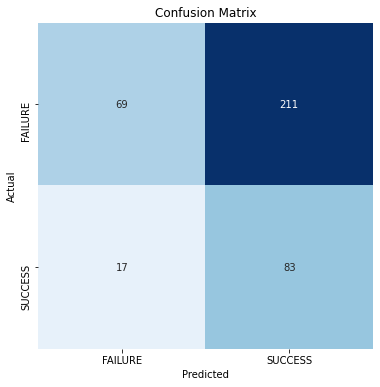


		Classification Report:
	--------------------------------------
               precision    recall  f1-score   support

     FAILURE       0.80      0.25      0.38       280
     SUCCESS       0.28      0.83      0.42       100

    accuracy                           0.40       380
   macro avg       0.54      0.54      0.40       380
weighted avg       0.67      0.40      0.39       380



In [93]:
y_pred = np.array(model.predict(X_test), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\tClassification Report:\n\t--------------------------------------\n', clr)

#### Feature Importance

In [94]:
feat_imp_df = pd.DataFrame(cat_.feature_importances_, columns = ['Importance'])
feat_imp_df['Features'] = new_data[feature].columns

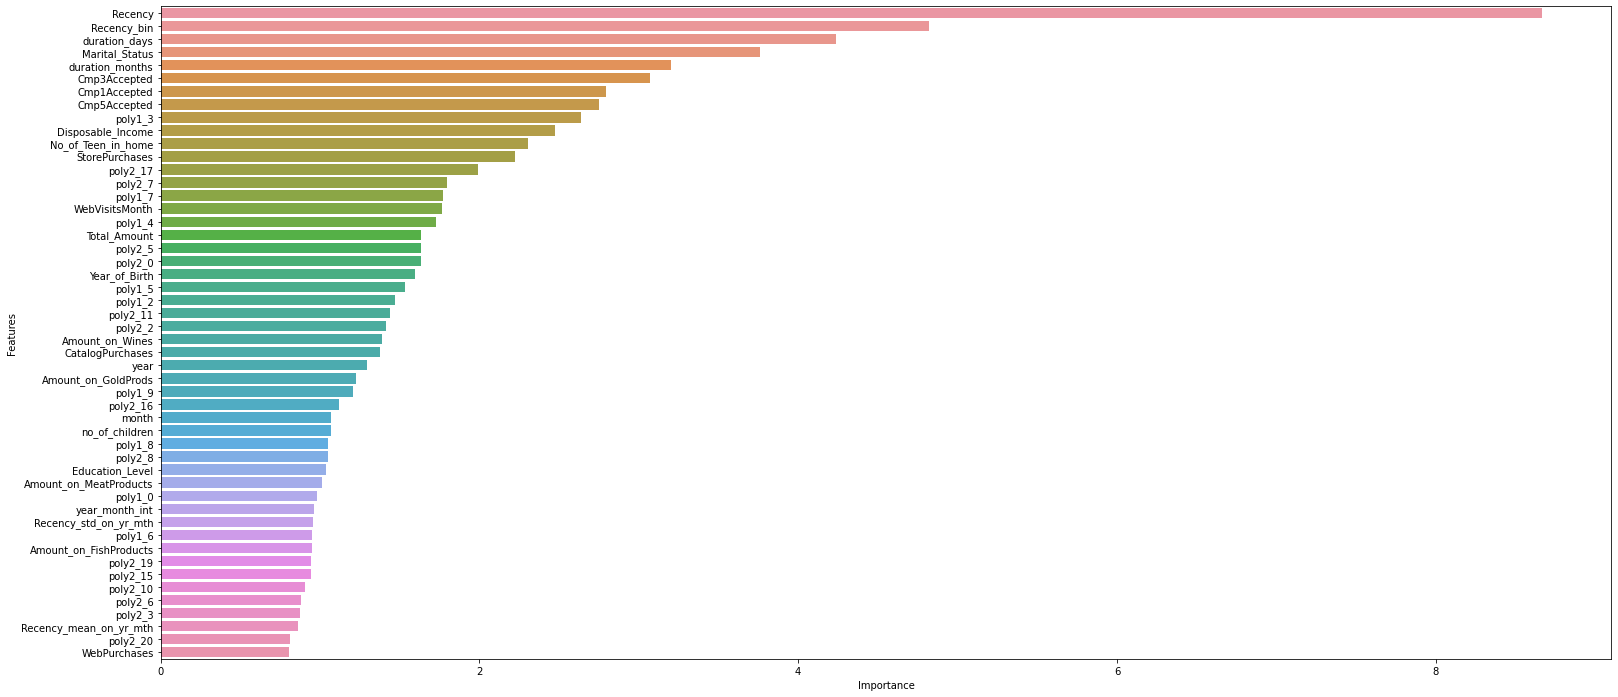

In [95]:
plt.figure(figsize = (26, 12))
sns.barplot(x = 'Importance', y = 'Features', data = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(50))
plt.show()

In [96]:
new_feat = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(60)['Features'].to_list()

In [97]:
len(feature)

71

#### Hyperparameter Tunning

In [98]:
import optuna

In [112]:
X = train_df[new_feat]
y = train_df[target]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [114]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

In [102]:
cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train,y_train)
pred = cat.predict(X_test)
pred_proba = cat.predict_proba(X_test)[:,1]

print('F1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

F1_score
0.5473684210526316
0.6776859504132232

Accuracy_score
0.8903061224489796
0.9005102040816326


In [115]:
print('Before sampling')
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {1 : 300, 0 : 996}, random_state = 43)
X_train_sam, y_train_sam = sm.fit_resample(X_train_sc, y_train)

print('After sampling')
counter = Counter(y_train_sam)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

Before sampling
Class=0, n=996 (84.766%)
Class=1, n=179 (15.234%)


After sampling
Class=0, n=996 (84.766%)
Class=1, n=300 (25.532%)


In [116]:
cat_ = CatBoostClassifier(verbose = 0)
cat_.fit(X_train_sam,y_train_sam)
pred = cat_.predict(X_test_sc)
pred_proba = cat_.predict_proba(X_test_sc)[:,1]

print('F1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

F1_score
0.6213592233009709
0.6666666666666667

Accuracy_score
0.9005102040816326
0.8903061224489796


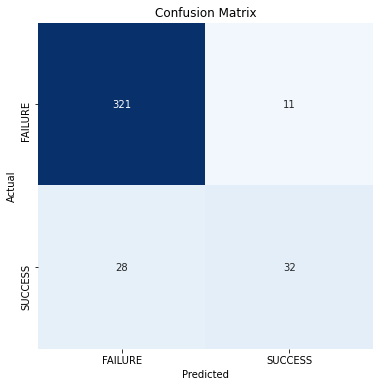


		Classification Report:
	--------------------------------------
               precision    recall  f1-score   support

     FAILURE       0.92      0.97      0.94       332
     SUCCESS       0.74      0.53      0.62        60

    accuracy                           0.90       392
   macro avg       0.83      0.75      0.78       392
weighted avg       0.89      0.90      0.89       392



In [117]:
cm = confusion_matrix(y_test, pred)
clr = classification_report(y_test, pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\tClassification Report:\n\t--------------------------------------\n', clr)

In [118]:
train_pool = Pool(X_train_sc, y_train)
eval_pool = Pool(X_test_sc, y_test)

def objectiveCB(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 50, 1000),
        depth=trial.suggest_int("depth", 4, 10),
        learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        random_strength=trial.suggest_int("random_strength", 0, 100),
        bagging_temperature=trial.suggest_loguniform("bagging_temperature", 0.01, 100.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        random_state = trial.suggest_int("random_state", 40, 100),
    )
    
    model.fit(train_pool, verbose=False)
    pred = model.predict(eval_pool)
    score = accuracy_score(y_test, np.rint(pred))
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objectiveCB, n_trials = 20)

[I 2022-01-25 21:18:13,008] A new study created in memory with name: no-name-f2b4bf25-5112-4411-b0c9-8b129912061d
[I 2022-01-25 21:18:17,537] Trial 0 finished with value: 0.8954081632653061 and parameters: {'iterations': 465, 'depth': 6, 'learning_rate': 0.17339118295932657, 'random_strength': 78, 'bagging_temperature': 51.01879581789438, 'od_type': 'IncToDec', 'od_wait': 15, 'random_state': 93}. Best is trial 0 with value: 0.8954081632653061.
[I 2022-01-25 21:18:27,016] Trial 1 finished with value: 0.8877551020408163 and parameters: {'iterations': 333, 'depth': 8, 'learning_rate': 0.08918170139440823, 'random_strength': 11, 'bagging_temperature': 12.360699329090773, 'od_type': 'IncToDec', 'od_wait': 47, 'random_state': 76}. Best is trial 0 with value: 0.8954081632653061.
[I 2022-01-25 21:18:29,078] Trial 2 finished with value: 0.8903061224489796 and parameters: {'iterations': 189, 'depth': 6, 'learning_rate': 0.19531438320342223, 'random_strength': 31, 'bagging_temperature': 11.684618

In [119]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print('Best Parameters: {}'.format(trial.params))
# print(trial)

Accuracy: 0.9005102040816326
Best Parameters: {'iterations': 878, 'depth': 4, 'learning_rate': 0.037473725196344086, 'random_strength': 4, 'bagging_temperature': 54.551359190756536, 'od_type': 'IncToDec', 'od_wait': 36, 'random_state': 90}


In [120]:
params = trial.params

In [124]:
cat = CatBoostClassifier(**params, verbose = 0)
cat.fit(X_train,y_train)
pred = cat.predict(X_test)
pred_proba = cat.predict_proba(X_test)[:,1]

print('F1_score')
print(f1_score(y_test, pred))
print(f1_score(y_test, np.where(pred_proba > 0.439, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.439, 1, 0)))

F1_score
0.6213592233009709
0.6542056074766355

Accuracy_score
0.9005102040816326
0.9056122448979592


In [122]:
cat_f1 = []
cat_a = []
threshold_value = np.linspace(0.1, 0.5, 80)

for thresh in threshold_value:
    pred_proba = cat.predict_proba(X_test)[:,1]
    cat_f1.append(f1_score(y_test, np.where(pred_proba > thresh, 1, 0)))
    cat_a.append(accuracy_score(y_test, np.where(pred_proba > thresh, 1, 0)))

cat_f1 = pd.Series(cat_f1)
cat_a = pd.Series(cat_a)
threshold = pd.Series(threshold_value)

Threshold = pd.concat([cat_a, cat_f1, threshold], axis = 1, keys = ['catboost_accuacy','catboost_f1', 'threshold'])

In [123]:
Threshold

,catboost_accuacy,catboost_f1,threshold
0,0.829082,0.603550,0.100000
1,0.831633,0.597561,0.105063
2,0.834184,0.601227,0.110127
3,0.839286,0.608696,0.115190
4,0.841837,0.612500,0.120253
5,0.844388,0.616352,0.125316
6,0.846939,0.620253,0.130380
7,0.849490,0.619355,0.135443
8,0.854592,0.627451,0.140506
9,0.857143,0.631579,0.145570
